In [2]:
from Functions.polygon_scrape import *
from Functions.RF_Funcs import *
import pandas as pd
import numpy as np
from secret import polygon_key
from datetime import datetime, date
import polygon as pg
import warnings
warnings.filterwarnings('ignore')
import time

In [3]:
import pandas_market_calendars as mcal
nyse = mcal.get_calendar('NYSE')
start_date = '2020-01-01'
end_date = '2023-12-31'
schedule = nyse.schedule(start_date=start_date, end_date=end_date)
trading_days = schedule['market_open'].dt.date.tolist()

In [13]:
data = pd.read_csv('Treasury.csv')

### Acquire Model Predictions

#### HAR

In [4]:
#Set date range to 2016 data = data[]

# X = data[['RV_(t-1)','RV_t Weekly', 'RV_t Monthly']]
# Y = data['RV_t (Realized Variance)']

# op = RollingWindowHAR(X,Y,data['date'])
# pred = np.sqrt(op['predictions'].loc['values'])*np.sqrt(365)
# df = pd.DataFrame(data=pred,index=data['date'][300:])
# df.to_csv('Data/predictions_HAR.csv')

#### Random Forests

MSE Optimization

In [3]:
# X = data[['RV_(t-1)','RV_t Weekly', 'RV_t Monthly',
#           'r_(t-1)', 'r_t Weekly', 'r_t Monthly',
#           'VIX Close (t-1)', '1MT (t-1)']]
# Y = data['RV_t (Realized Variance)']

# X['1MT (t-1)'] = pd.to_numeric(X['1MT (t-1)'], errors='coerce')
# X['1MT (t-1)'] = X['1MT (t-1)'].fillna((X['1MT (t-1)'].shift(+1) + X['1MT (t-1)'].shift(-1)) / 2)

# op = RollingWindowRF(X,Y,data['date'])
# pred = np.sqrt(op['predictions'].loc['values'])*np.sqrt(365)
# df = pd.DataFrame(data=pred,index=data['date'][300:])
# df.to_csv('Data/predictions_RF.csv')

MAE Optimization

In [ ]:
# op = RollingWindowRF(X[-330:].reset_index(drop=True),Y[-330:].reset_index(drop=True),data['date'][-330:].reset_index(drop=True),w=150,method='mae')
# pred = np.sqrt(op['predictions'].loc['values'])*np.sqrt(365)

# df = pd.DataFrame(data=pred,index=data['date'][-180:])
# df.to_csv('Data/predictions_RF_MAE.csv')

### Import data to avoid long runtime

In [66]:
pred_RF = pd.read_csv('Data/predictions_RF.csv').set_index('date')['values']
pred_RF_MAE = pd.read_csv('Data/predictions_RF_MAE.csv').set_index('date')['values']
pred_HAR = pd.read_csv('Data/predictions_HAR.csv').set_index('date')['values']

### Deploy the Option Strategy Using the Prediction

HAR

In [16]:
dates = data['date'].iloc[-180:]

result_HAR = []

for date in dates:
    try:
        result_HAR.append(OptionStrategy(model_estimate=pred_HAR[date],date=datetime.strptime(date,'%m/%d/%y').date(), trading_days=trading_days))
    except LookupError:
        result_HAR.append('Data Not Found')
    print(f'{date}: {result_HAR[-1]}')
    time.sleep(62)

11/21/22: {'Profit': -2.34, 'Investment': 2.56, 'Return': '-91.39%', 'Results': {'Stock close': 394.59, 'Stock close next': 399.9, 'Call close': 1.42, 'Put close': 1.13, 'Avg IV': 0.18331678994465167}, '# Calls': 1, '# Puts': 1.009}
11/22/22: {'Profit': 0.88, 'Investment': 3.3, 'Return': '26.58%', 'Results': {'Stock close': 399.9, 'Stock close next': 402.42, 'Call close': 1.47, 'Put close': 1.14, 'Avg IV': 0.18354528492297828}, '# Calls': 1, '# Puts': 1.602}
11/23/22: {'Profit': -1.59, 'Investment': 1.59, 'Return': '-100.0%', 'Results': {'Stock close': 402.42, 'Stock close next': 402.33, 'Call close': 0.9, 'Put close': 0.86, 'Avg IV': 0.13234160530145422}, '# Calls': 1, '# Puts': 0.801}
11/25/22: {'Profit': -2.8, 'Investment': 1.83, 'Return': '-152.78%', 'Results': {'Stock close': 402.33, 'Stock close next': 395.91, 'Call close': 0.98, 'Put close': 1.12, 'Avg IV': 0.15277180056563877}, '# Calls': 1, '# Puts': 0.76}
11/28/22: {'Profit': 3.01, 'Investment': 3.01, 'Return': '100.0%', 'Res

Random Forests

In [17]:
result_RF = []

for date in dates:
    try:
        result_RF.append(OptionStrategy(model_estimate=pred_RF[date],date=datetime.strptime(date,'%m/%d/%y').date(), trading_days=trading_days))
    except LookupError:
        result_RF.append('Data Not Found')
    print(f'{date}: {result_RF[-1]}')
    time.sleep(62)

11/21/22: {'Profit': -2.34, 'Investment': 2.56, 'Return': '-91.39%', 'Results': {'Stock close': 394.59, 'Stock close next': 399.9, 'Call close': 1.42, 'Put close': 1.13, 'Avg IV': 0.18331678994465167}, '# Calls': 1, '# Puts': 1.009}
11/22/22: {'Profit': 0.88, 'Investment': 3.3, 'Return': '26.58%', 'Results': {'Stock close': 399.9, 'Stock close next': 402.42, 'Call close': 1.47, 'Put close': 1.14, 'Avg IV': 0.18354528492297828}, '# Calls': 1, '# Puts': 1.602}
11/23/22: {'Profit': -1.59, 'Investment': 1.59, 'Return': '-100.0%', 'Results': {'Stock close': 402.42, 'Stock close next': 402.33, 'Call close': 0.9, 'Put close': 0.86, 'Avg IV': 0.13234160530145422}, '# Calls': 1, '# Puts': 0.801}
11/25/22: {'Profit': -2.8, 'Investment': 1.83, 'Return': '-152.78%', 'Results': {'Stock close': 402.33, 'Stock close next': 395.91, 'Call close': 0.98, 'Put close': 1.12, 'Avg IV': 0.15277180056563877}, '# Calls': 1, '# Puts': 0.76}
11/28/22: {'Profit': 3.01, 'Investment': 3.01, 'Return': '100.0%', 'Res

In [68]:
result_RF_MAE = []

for date in dates:
    try:
        result_RF_MAE.append(OptionStrategy(model_estimate=pred_RF_MAE[date],date=datetime.strptime(date,'%m/%d/%y').date(), trading_days=trading_days))
    except LookupError:
        result_RF_MAE.append('Data Not Found')
    print(f'{date}: {result_RF_MAE[-1]}')
    time.sleep(62)

11/21/22: {'Profit': -2.34, 'Investment': 2.56, 'Return': '-91.39%', 'Results': {'Stock close': 394.59, 'Stock close next': 399.9, 'Call close': 1.42, 'Put close': 1.13, 'Avg IV': 0.18331678994465167}, '# Calls': 1, '# Puts': 1.009}
11/22/22: {'Profit': 0.88, 'Investment': 3.3, 'Return': '26.58%', 'Results': {'Stock close': 399.9, 'Stock close next': 402.42, 'Call close': 1.47, 'Put close': 1.14, 'Avg IV': 0.18354528492297828}, '# Calls': 1, '# Puts': 1.602}
11/23/22: {'Profit': 1.59, 'Investment': 1.59, 'Return': '100.0%', 'Results': {'Stock close': 402.42, 'Stock close next': 402.33, 'Call close': 0.9, 'Put close': 0.86, 'Avg IV': 0.13234160530145422}, '# Calls': 1, '# Puts': 0.801}
11/25/22: {'Profit': -2.8, 'Investment': 1.83, 'Return': '-152.78%', 'Results': {'Stock close': 402.33, 'Stock close next': 395.91, 'Call close': 0.98, 'Put close': 1.12, 'Avg IV': 0.15277180056563877}, '# Calls': 1, '# Puts': 0.76}
11/28/22: {'Profit': 3.01, 'Investment': 3.01, 'Return': '100.0%', 'Resul

Export Results

In [70]:
result_HAR_df = pd.DataFrame(data=result_HAR, index=dates)
result_RF_df = pd.DataFrame(data=result_RF, index=dates)
result_RF_MAE_df = pd.DataFrame(data=result_RF_MAE, index=dates)

result_HAR_df.to_csv('Results/HAR_results_1.7.24')
result_RF_df.to_csv('Results/RF_results_1.7.24')
result_RF_MAE_df.to_csv('Results/RF_MAE_results_1.7.24')

Result Analysis

In [71]:
return_RF_time, return_RF_MAE_time, return_HAR_time = ([],[],[])

for i in range(len(result_RF)):
    return_RF_time.append(np.sum([float(d['Return'][:-1]) for d in result_RF[:i]]))
    return_RF_MAE_time.append(np.sum([float(d['Return'][:-1]) for d in result_RF_MAE[:i]]))
    return_HAR_time.append(np.sum([float(d['Return'][:-1]) for d in result_HAR[:i]]))

In [72]:
total_return_HAR = np.sum([float(d['Return'][:-1]) for d in result_HAR])
total_return_RF = np.sum([float(d['Return'][:-1]) for d in result_RF])
total_return_RF_MAE = np.sum([float(d['Return'][:-1]) for d in result_RF_MAE])

print(f'Total return for HAR from {dates.iloc[0]}-{dates.iloc[-1]}: {int(total_return_HAR)}%. Average daily return: {round(total_return_HAR/len(dates),2)}%. Daily return variance: {round(np.std([float(d["Return"][:-1]) for d in result_HAR]),2)}')
print(f'Total return for RF from {dates.iloc[0]}-{dates.iloc[-1]}: {int(total_return_RF)}%. Average daily return: {round(total_return_RF/len(dates),2)}%. Daily return variance: {round(np.std([float(d["Return"][:-1]) for d in result_RF]),2)}')
print(f'Total return for RF from {dates.iloc[0]}-{dates.iloc[-1]}: {int(total_return_RF_MAE)}%. Average daily return: {round(total_return_RF_MAE/len(dates),2)}%. Daily return variance: {round(np.std([float(d["Return"][:-1]) for d in result_RF_MAE]),2)}')

Total return for HAR from 11/21/22-8/10/23: 146%. Average daily return: 0.81%. Daily return variance: 91.47
Total return for RF from 11/21/22-8/10/23: 357%. Average daily return: 1.99%. Daily return variance: 91.45
Total return for RF from 11/21/22-8/10/23: 710%. Average daily return: 3.95%. Daily return variance: 91.39


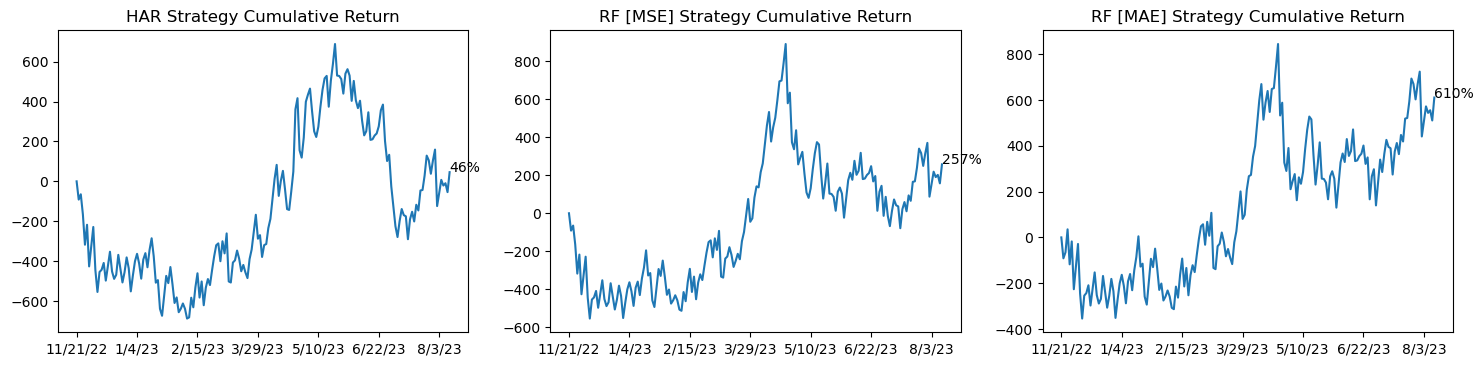

In [74]:
plots = [return_HAR_time,return_RF_time,return_RF_MAE_time]
title = ['HAR','RF [MSE]', 'RF [MAE]']

fig, ax = plt.subplots(1,3,figsize=(18,4),dpi=100)

for i, val in enumerate(plots):
    ax[i].plot(dates,val)
    ax[i].set_xticks(dates[::29])
    ax[i].set_title(f'{title[i]} Strategy Cumulative Return')
    ax[i].annotate(f'{int(plots[i][-1])}%', (dates.iloc[-1],plots[i][-1]))
    
plt.show()